# Feature spaces, Linear Algebra, Numeric data methods, Linear Regression
#### Part 1
1. Feature space from csv file. Read `data/ds_salaries.csv` into a pandas dataframe
2. Prune the dataset to only have columns: "work_year", "experience_level", "salary_in_usd", "job_title", "company_location", "company_size".
3. Onehot encode "experience_level". Hint: look up pandas: `get_dummies()` method.
4. labelencode "company_location" 
5. Normalize the company_location number (relative value between 0-1) ![](https://cdn-images-1.medium.com/max/253/1*Dl3P3Rrzto258X0Ales9Xw.png)
6. Make binning of the salary column (both cut and qcut methods).
7. Make a barplot with binned salaries to show the company size count for each of the bins. Like this: 

![](images/binned_salaries.jpg")

Hint: Use pandas Series unstack() method to get a dataframe from a multiindex Series object (The result of making a groupby count on both salary_bins and company_size columns



In [27]:
import pandas as pd
df = pd.read_csv('../data/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [28]:
data = df[['work_year', 'experience_level', 'salary_in_usd', 'job_title','company_location','company_size']]
data

,work_year,experience_level,salary_in_usd,job_title,company_location,company_size
0,2020,MI,79833,Data Scientist,DE,L
1,2020,SE,260000,Machine Learning Scientist,JP,S
2,2020,SE,109024,Big Data Engineer,GB,M
3,2020,MI,20000,Product Data Analyst,HN,S
4,2020,SE,150000,Machine Learning Engineer,US,L
...,...,...,...,...,...,...
602,2022,SE,154000,Data Engineer,US,M
603,2022,SE,126000,Data Engineer,US,M
604,2022,SE,129000,Data Analyst,US,M
605,2022,SE,150000,Data Analyst,US,M


In [3]:
data = pd.get_dummies(data, columns = ['experience_level'])

In [4]:
data

,work_year,salary_in_usd,job_title,company_location,company_size,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,2020,79833,Data Scientist,DE,L,0,0,1,0
1,2020,260000,Machine Learning Scientist,JP,S,0,0,0,1
2,2020,109024,Big Data Engineer,GB,M,0,0,0,1
3,2020,20000,Product Data Analyst,HN,S,0,0,1,0
4,2020,150000,Machine Learning Engineer,US,L,0,0,0,1
...,...,...,...,...,...,...,...,...,...
602,2022,154000,Data Engineer,US,M,0,0,0,1
603,2022,126000,Data Engineer,US,M,0,0,0,1
604,2022,129000,Data Analyst,US,M,0,0,0,1
605,2022,150000,Data Analyst,US,M,0,0,0,1


labelencode "company_location"

In [6]:
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
#bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
#bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data['company_location'] = labelencoder.fit_transform(data['company_location'])
data

,work_year,salary_in_usd,job_title,company_location,company_size,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,2020,79833,Data Scientist,12,L,0,0,1,0
1,2020,260000,Machine Learning Scientist,29,S,0,0,0,1
2,2020,109024,Big Data Engineer,18,M,0,0,0,1
3,2020,20000,Product Data Analyst,20,S,0,0,1,0
4,2020,150000,Machine Learning Engineer,48,L,0,0,0,1
...,...,...,...,...,...,...,...,...,...
602,2022,154000,Data Engineer,48,M,0,0,0,1
603,2022,126000,Data Engineer,48,M,0,0,0,1
604,2022,129000,Data Analyst,48,M,0,0,0,1
605,2022,150000,Data Analyst,48,M,0,0,0,1


Normalize the company_location number (relative value between 0-1)

In [7]:
from sklearn import preprocessing
import pandas as pd

min_max = preprocessing.MinMaxScaler()
scaled_df = min_max.fit_transform(data['company_location'].values.reshape(-1,1))
data['company_location'] = pd.DataFrame(scaled_df,columns=["company_location"])
data

,work_year,salary_in_usd,job_title,company_location,company_size,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,2020,79833,Data Scientist,0.244898,L,0,0,1,0
1,2020,260000,Machine Learning Scientist,0.591837,S,0,0,0,1
2,2020,109024,Big Data Engineer,0.367347,M,0,0,0,1
3,2020,20000,Product Data Analyst,0.408163,S,0,0,1,0
4,2020,150000,Machine Learning Engineer,0.979592,L,0,0,0,1
...,...,...,...,...,...,...,...,...,...
602,2022,154000,Data Engineer,0.979592,M,0,0,0,1
603,2022,126000,Data Engineer,0.979592,M,0,0,0,1
604,2022,129000,Data Analyst,0.979592,M,0,0,0,1
605,2022,150000,Data Analyst,0.979592,M,0,0,0,1


Make binning of the salary column (both cut and qcut methods).

/tmp/ipykernel_56/1919578926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cut4'] = pd.cut(data['salary_in_usd'],


<BarContainer object of 4 artists>

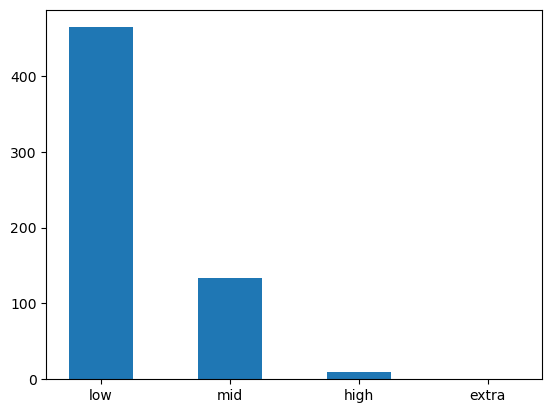

In [31]:
data['cut4'] = pd.cut(data['salary_in_usd'],
       4, labels=["low", "mid", "high","extra"])
data['cut4'].value_counts()

import matplotlib.pyplot as plt
plt.bar(list(data['cut4'].unique()),data['cut4'].value_counts(),width=0.5, align='center')


In [32]:
data['qcut4'] = pd.qcut(data['salary_in_usd'], q=4) # ext price devided into 4 buckets/bins using pandas .qcut() method

data['qcut4'].value_counts()

/tmp/ipykernel_56/1307330072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['qcut4'] = pd.qcut(data['salary_in_usd'], q=4) # ext price devided into 4 buckets/bins using pandas .qcut() method


(101570.0, 150000.0]    156
(2858.999, 62726.0]     153
(62726.0, 101570.0]     151
(150000.0, 600000.0]    147
Name: qcut4, dtype: int64

Make a barplot with binned salaries to show the company size count for each of the bins. Like this

<AxesSubplot: xlabel='cut4'>

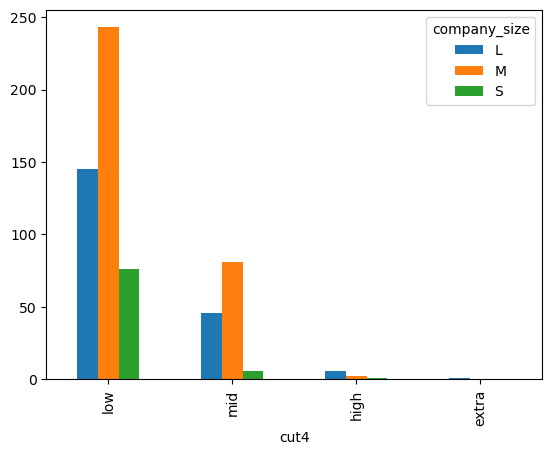

In [33]:
data.groupby(['cut4','company_size']).size().unstack().plot(kind='bar', stacked=False)

#### Part 2
8. Make it into a function that can take either company_size or experience_level as arguments.
9. Change the experience_level column to be numeric using this dictionary: `experience = {'EN':10,'EX':20,'MI':30,'SE':40}`. Hint: [Here](https://sparkbyexamples.com/pandas/pandas-remap-values-in-column-with-a-dictionary-dict/).
10. Use seaborn pairplot to see if there is an approximately linear relationship between experience_level and salary
11. scatter Plot the 2d feature space of 'experience_level' and 'salary_in_usd
12. Use sklearn to find the best possible linear relationship between experience_level and salary_in_usd using linear regression.

In [34]:
experience = {'EN':10,'EX':20,'MI':30,'SE':40}
data.replace({"experience_level": experience},inplace=True)

def groupby(col):
    data.groupby(['cut4',col]).size().unstack().plot(kind='bar', stacked=False)
    


/tmp/ipykernel_56/3465112476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({"experience_level": experience},inplace=True)


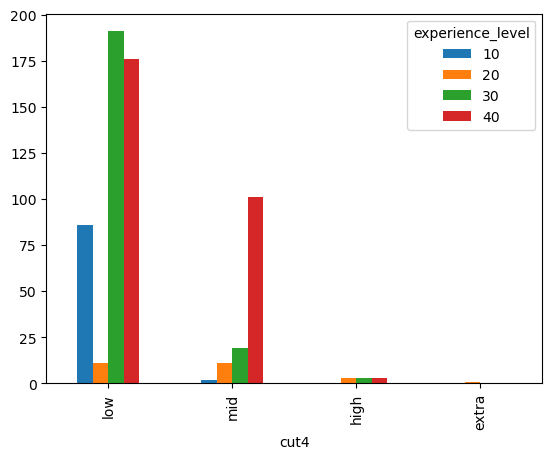

In [35]:
groupby('experience_level')
#data.head()

Use seaborn pairplot to see if there is an approximately linear relationship between experience_level and salary

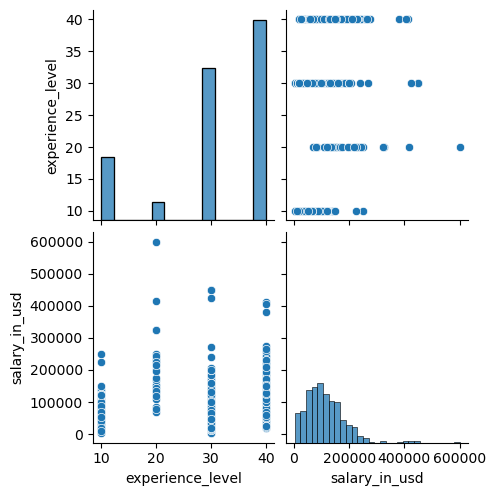

In [218]:
import seaborn as sb

sb.pairplot(data[['experience_level','salary_in_usd']])


scatter Plot the 2d feature space of 'experience_level' and 'salary_in_usd

<AxesSubplot: xlabel='experience_level', ylabel='salary_in_usd'>

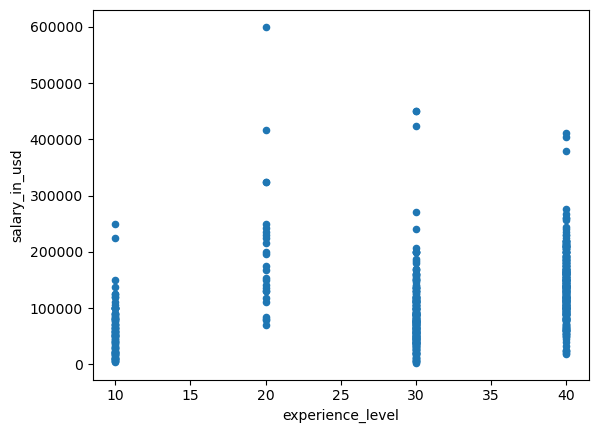

In [39]:
data[['experience_level','salary_in_usd']].plot.scatter(x = 0, y = 1)

Use sklearn to find the best possible linear relationship between experience_level and salary_in_usd using linear regression.

In [40]:
data[['experience_level','salary_in_usd']].corr()

,experience_level,salary_in_usd
experience_level,1.000000,0.315312
salary_in_usd,0.315312,1.000000


## Part 3: Linear Algebra
Given the below dictionarys find out where each of the 4 people find the cheapest shopping according to their needs.
```python
shoppers = {
'Paula':{'Is':4,'Juice':2,'Kakao':3,'Lagkager':2},
'Peter':{'Is':2,'Juice':5,'Kakao':0, 'Lagkager':4},
'Pandora':{'Is':5,'Juice':3, 'Kakao':4, 'Lagkager':5},
'Pietro':{'Is':1,'Juice':8, 'Kakao':9, 'Lagkager':1}
}
shop_prices = {
    'Netto': {'Is':10.50,'Juice':2.25,'Kakao':4.50,'Lagkager':33.50},
    'Fakta': {'Is':4.00,'Juice':4.50,'Kakao':6.25,'Lagkager':20.00}
}
```
Hint: you can use pandas and Transpose to create dataframe: `pd.DataFrame(shoppers).T` to get the necessary shape of the dataframe/matrix. Also use df.to_numpy() to changes a Pandas DataFrame df into a numpy ndarray with only the numeric data

In [2]:
shoppers = {
'Paula':{'Is':4,'Juice':2,'Kakao':3,'Lagkager':2},
'Peter':{'Is':2,'Juice':5,'Kakao':0, 'Lagkager':4},
'Pandora':{'Is':5,'Juice':3, 'Kakao':4, 'Lagkager':5},
'Pietro':{'Is':1,'Juice':8, 'Kakao':9, 'Lagkager':1}
}
shop_prices = {
    'Netto': {'Is':10.50,'Juice':2.25,'Kakao':4.50,'Lagkager':33.50},
    'Fakta': {'Is':4.00,'Juice':4.50,'Kakao':6.25,'Lagkager':20.00}
}

In [48]:
import pandas as pd
import numpy as py

df_shoppers = pd.DataFrame(shoppers).T
df_prices = pd.DataFrame(shop_prices)

shoppers_ndarray = df_shoppers.to_numpy()
prices_ndarray = df_prices.to_numpy()

In [50]:
prices_ndarray

array([[10.5 ,  4.  ],
       [ 2.25,  4.5 ],
       [ 4.5 ,  6.25],
       [33.5 , 20.  ]])

In [49]:
shoppers_ndarray

array([[4, 2, 3, 2],
       [2, 5, 0, 4],
       [5, 3, 4, 5],
       [1, 8, 9, 1]])

In [51]:
shoppers_ndarray.dot(prices_ndarray)

array([[127.  ,  83.75],
       [166.25, 110.5 ],
       [244.75, 158.5 ],
       [102.5 , 116.25]])